# Exploratory Data Analysis - Terrorism

## `Goals` :
    . Perform ‘Exploratory Data Analysis’ on dataset  ‘Global Terrorism’ 
    . As a security/defense analyst, the job is to find out the hot zone of terrorism. 
    . What all security issues and insights can be derived?

## 1. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns

## 2. Loading the dataset and pre-processing the data.

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', low_memory=False)
print(f'Features are : {df.columns}\n')
print(f'Shape of the Dataframe is : {df.shape}\n')
df.head(5)

Features are : Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Shape of the Dataframe is : (181691, 135)



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## 2i. Filling out Null values with zero's

In [3]:
df.fillna(value=0, inplace=True)
print(df.shape)

(181691, 135)


## 2ii. Looking at useful feature columns.

In [4]:
df.loc[df['success']==1].shape

(161632, 135)

In [5]:
df.loc[df['suicide']==1].shape

(6633, 135)

In [6]:
df['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [7]:
len(df['country_txt'].unique())

205

In [8]:
df['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [9]:
df['weaptype1_txt'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [10]:
df['targtype1_txt'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

## Selecting only the necessary columns

In [1]:
columns = ['iyear', 'region_txt', 'country_txt', 'success', 'attacktype1_txt', 'suicide', 'targsubtype1_txt', 'natlty1_txt', 'weaptype1_txt', ]
new_df = df[columns]
new_df = new_df.reset_index(drop=True)
print(new_df.shape)
new_df.head(4)

NameError: name 'df' is not defined

## Visualizing the Number of Crimes Committed per Year.

## Helper function to build all the charts

In [12]:
def plot_graphs(figsize, df, feature, title, xlabel, ylabel,threshold, color_palette='flare', horizontal=False, annotate=True):
    plt.figure(figsize=figsize)
    sns.set_style('darkgrid')
    sns.set(color_codes=True)
    palette = sns.color_palette(color_palette)
    sns.despine(left=True)
    temp = df.groupby(feature).count()
    temp = temp.loc[temp['success']>=threshold]
    if horizontal==True:
        plots = sns.barplot(y=temp.index, x=temp['success'], data=temp, palette=palette, orient='h')
    else:
        plots = sns.barplot(x=temp.index, y=temp['success'], data=temp, palette=palette)
    if annotate==True:
        for bar in plots.patches:
            plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',size=10, xytext=(0, 8),textcoords='offset points')
    plt.title(title, size=15)
    plt.xlabel(xlabel, size=10)
    plt.ylabel(ylabel, size=10)
    plt.xticks(rotation='vertical')
    plt.show()

## Year Wise Crime Chart

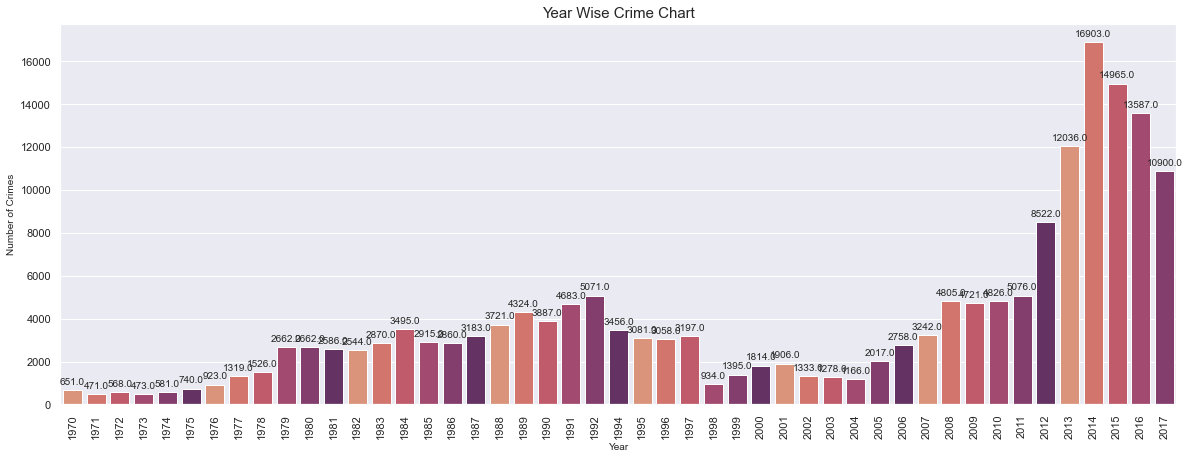

In [13]:
plot_graphs(figsize=(20,7),df=new_df, feature='iyear', title='Year Wise Crime Chart', xlabel='Year', ylabel='Number of Crimes', color_palette='flare', threshold=0)

## Region Wise Crime Chart

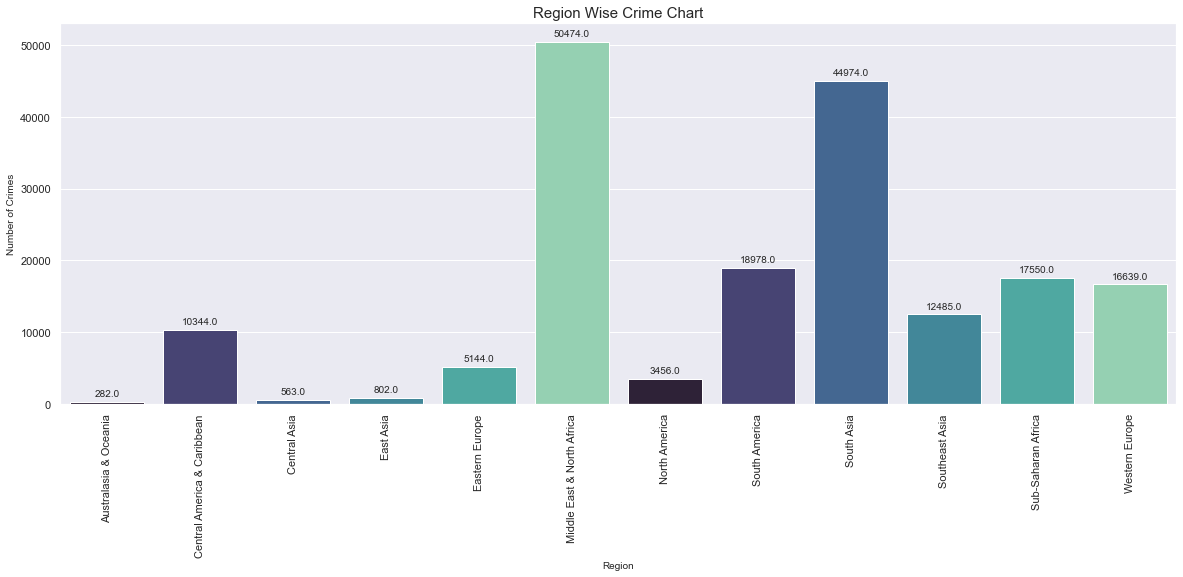

In [14]:
plot_graphs(figsize=(20,7),df=new_df, feature='region_txt', title='Region Wise Crime Chart', xlabel='Region', ylabel='Number of Crimes', color_palette='mako', threshold=0)

## From these charts, we get that,
 - the number of crime has been greatly increasing since `2008`
 - The `Middle East & North Africa` & `South Asia` is the `hot` Crime Regions.

If we apply these observation , we can narrow down the hot zone of terrorism.

In [15]:
new_df_cpy = new_df.loc[(new_df['iyear']>=2008) | (new_df['region_txt']=='Middle East & North Africa') | (new_df['region_txt']=='South Asia')]

## Country Wise Crime Chart

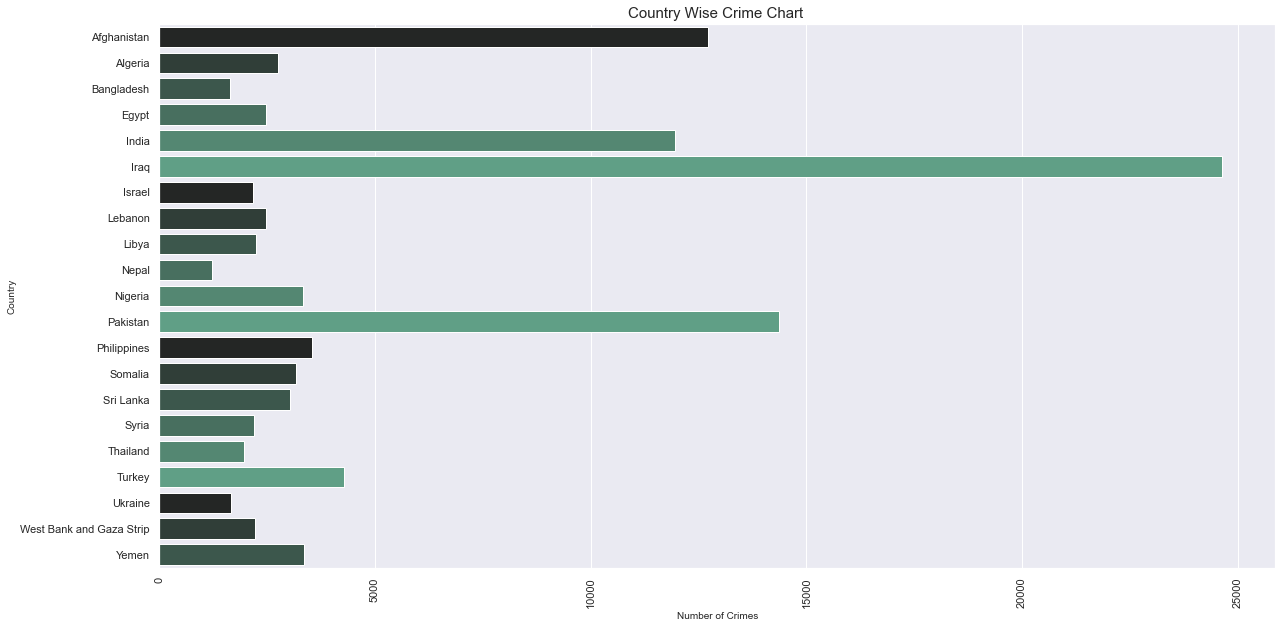

In [16]:
plot_graphs(figsize=(20,10),df=new_df_cpy,feature='country_txt', title='Country Wise Crime Chart ', ylabel='Country', xlabel='Number of Crimes', color_palette='dark:#5A8', threshold=1000, horizontal=True, annotate=False)

## We can say that countries are the hot zone of terrorism.

## Most Crime type of Recent Time(Since 2008)

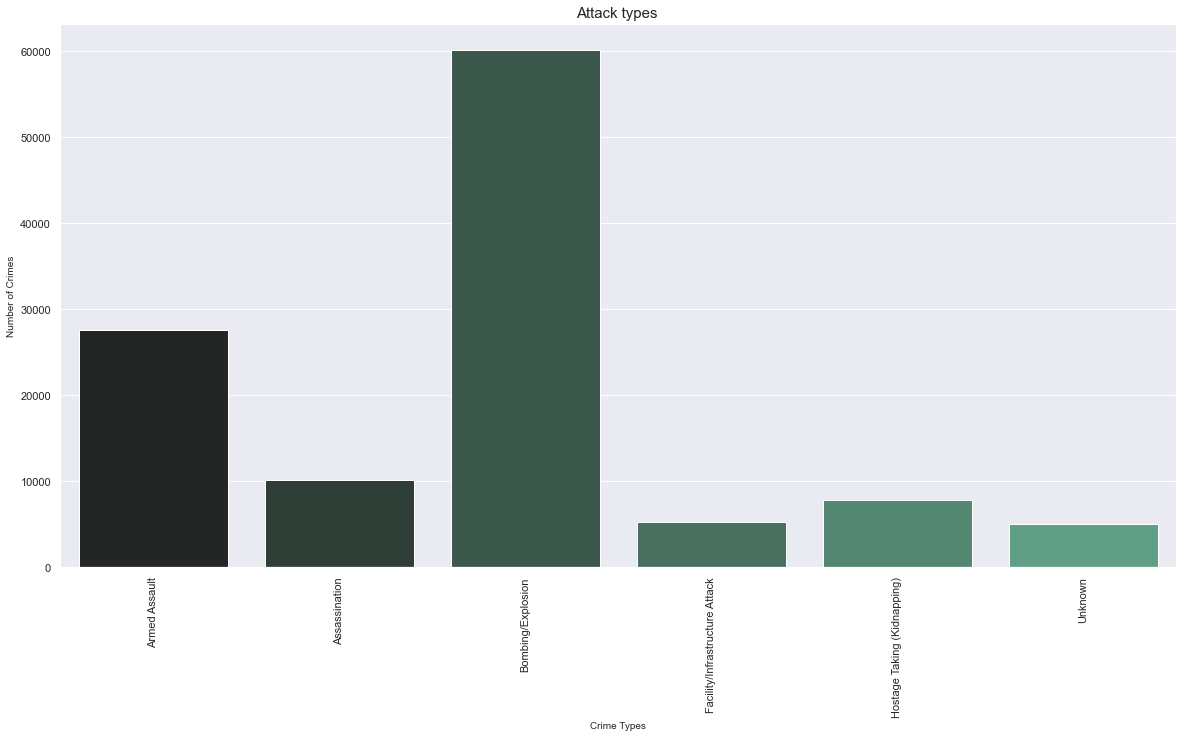

In [26]:
plot_graphs(figsize=(20,10),df=new_df_cpy,feature='attacktype1_txt', title='Attack types ', xlabel='Crime Types', ylabel='Number of Crimes', color_palette='dark:#5A8', threshold=1000, horizontal=False, annotate=False)

## Most used weapon type (Since 2008)

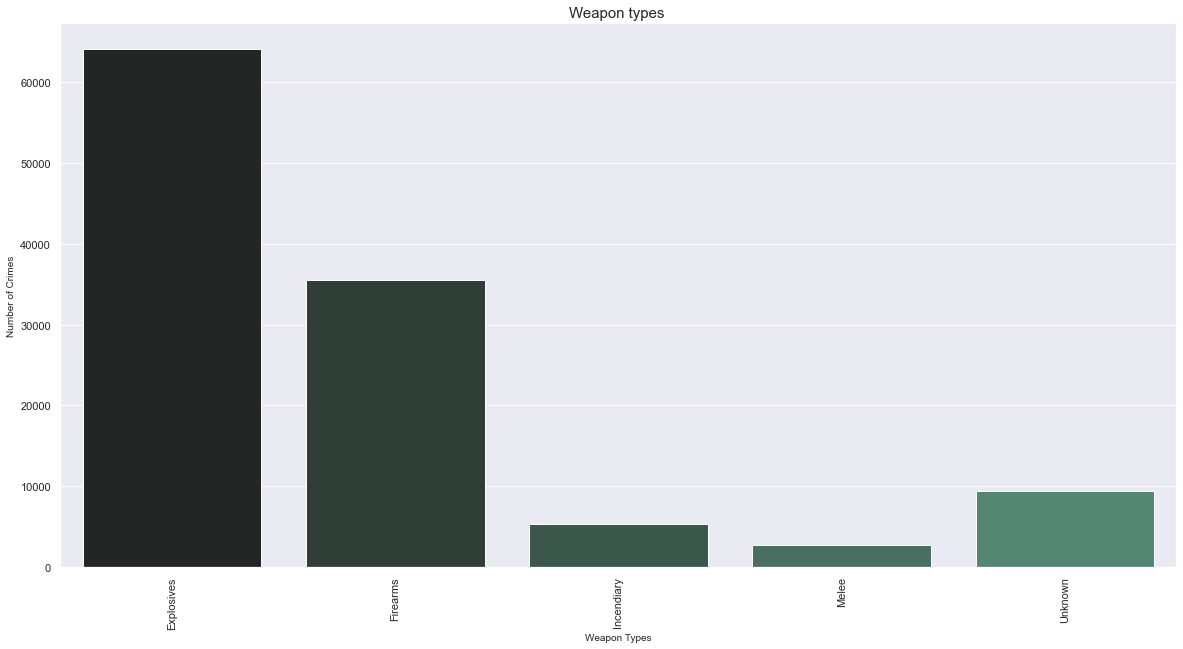

In [24]:
plot_graphs(figsize=(20,10),df=new_df_cpy,feature='weaptype1_txt', title='Weapon types ', xlabel='Weapon Types', ylabel='Number of Crimes', color_palette='dark:#5A8', threshold=1000, horizontal=False, annotate=False)

## Targetted Personels that are being targetted the most.(Since 2008)

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


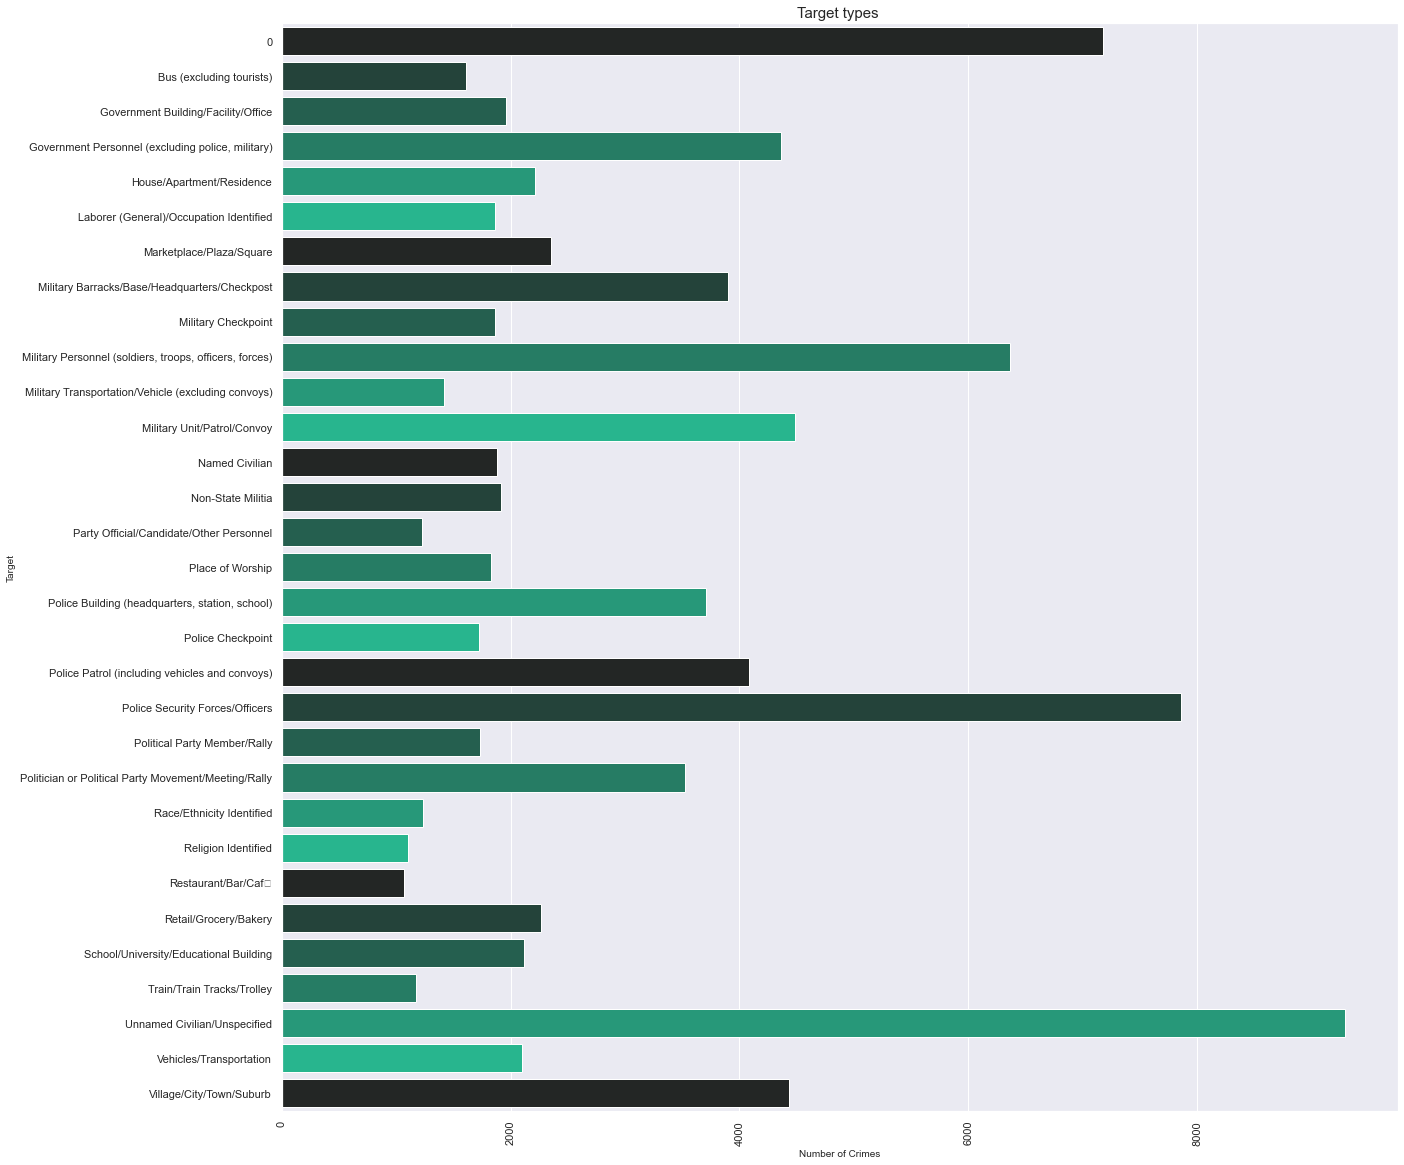

In [21]:
plot_graphs(figsize=(20,20),df=new_df_cpy,feature='targsubtype1_txt', title='Target types ', ylabel='Target', xlabel='Number of Crimes', color_palette='dark:#1C9', threshold=1000, horizontal=True, annotate=False)

## Citizens that are being attacked the most (Since 2012)

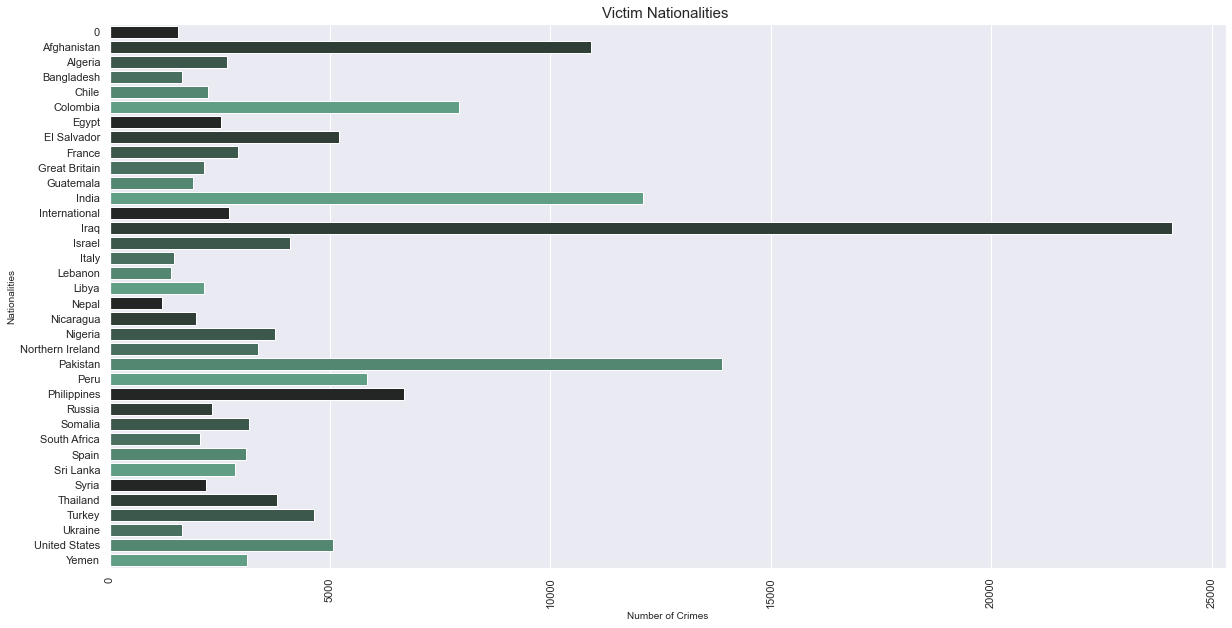

In [19]:
plot_graphs(figsize=(20,10),df=new_df,feature='natlty1_txt', title='Victim Nationalities ', ylabel='Nationalities', xlabel='Number of Crimes', color_palette='dark:#5A8', threshold=1000, horizontal=True, annotate=False)